# National Organizations Survey (NOS), 1996-1997

[Documentation and download](https://www.icpsr.umich.edu/web/ICPSR/studies/3190#)

In [2]:
#!pip install pyreadstat

In [3]:
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%cd ~/Downloads/ICPSR_03190spss/DS0001

/Users/alexanderclark/Downloads/ICPSR_03190spss/DS0001


In [5]:
df, meta = pyreadstat.read_por('03190-0001-Data.por')
# df.to_csv("NOS-data.csv")

# Relevant Papers

[Herring 2009](https://doi.org/10.1177/000312240907400203) <br>
[Herring 2017](https://doi.org/10.1177/0003122417716611) <br>
[Stojmenovska et al 2017](https://doi.org/10.1177/0003122417714422) & [replication files](https://stojmenovska.com/wp-content/uploads/2017/05/rp_2017_stojmenovska_bol_leopold_ASR.zip)

In [6]:
# Columns
parity_aid_r = 25 # p 214 Herring 2009
parity_aid_g = 46

revenue = 'O9'
total_ft_employees = 'A7'
total_no_ft_female_employees = 'A7A_N'
total_pct_ft_female_employees = 'A7A_P'
total_no_ft_white_employees = 'A7B_N'
total_pct_ft_white_employees = 'A7B_P'

In [7]:
df[revenue].describe()#value_counts()

count    1.002000e+03
mean     2.483574e+10
std      4.065499e+10
min     -9.990000e+02
25%     -9.990000e+02
50%      1.500000e+06
75%      8.888889e+10
max      1.000000e+11
Name: O9, dtype: float64

/Users/alexanderclark


/tmp/ipykernel_45369/3681132107.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{i/1_000_000_000:,.0f}B' for i in xticks])


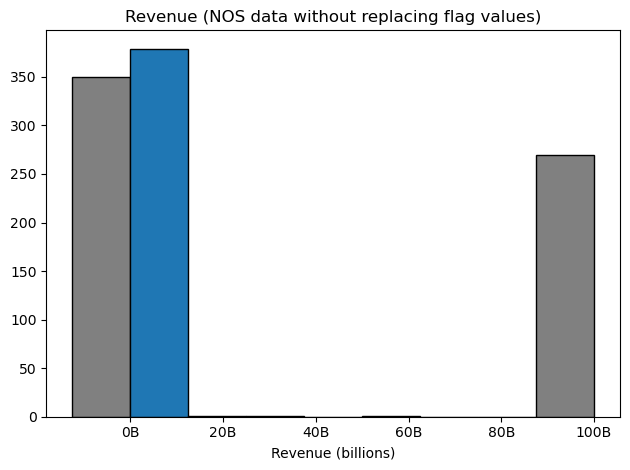

In [13]:
# Uncorrected Histogram

dk = 88_888_888_888
ra = 99_999_999_999
upper = 100_000_000_000

#d = df[revenue].astype(float)
#d = d[d>0]
#d = d[d < 8.8*10**10]

fig, ax = plt.subplots()
b = ( -upper*.125, -1, 0, upper*.125, upper*.25, upper*.375, upper*.5, upper*.625, upper*.75, upper*.875, upper)
counts, bin_edges, patches = ax.hist(df[revenue],
        ec = 'black',
        bins = b)

bin_colors = ['gray', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'gray']
# Apply colors to each patch
for patch, color in zip(patches, bin_colors):
    patch.set_facecolor(color)

ax.ticklabel_format(axis='x', useOffset=False)

xticks = ax.get_xticks()
ax.set_xticklabels([f'{i/1_000_000_000:,.0f}B' for i in xticks])
ax.set_title("Revenue (NOS data without replacing flag values)")
ax.set_xlabel("Revenue (billions)")

plt.tight_layout()
%cd ~
plt.savefig("Documents/GitHub/Stats1101/book/images/nos_histogram.svg", format = 'svg', transparent = True)
plt.show()